In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import time
from pykrx import stock
import FinanceDataReader as fdr
import pandas_datareader.data as data
import pymysql
import csv

C:\Anaconda\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


### 거래소 전종목 가격, 재무, 수급, 공매도, 대차 데이터 수집 (by dataguide)

In [2]:
"""
stock_info = pd.read_csv('stock_info2.csv', encoding = 'CP949')
stock_array = np.array(stock_info.iloc[7:,:])
stock_info_T = pd.DataFrame(stock_array.T)
stock_info_T.columns = stock_info_T.iloc[0,:]
stock_info_T2 = stock_info_T.iloc[1:,:]
stock_info_T3 = stock_info_T2.iloc[5:,:]

stock_except_date = stock_info_T3.iloc[:,1:]
db_ar = np.empty((0,20))

for i in list(range(int(len(stock_except_date.columns) / 18))) :
    date_ar = np.array(stock_info_T3.Symbol)[:, np.newaxis]
    stock_ar = np.array(stock_except_date.iloc[:, i*18 : i*18 + 18])
    lower = np.hstack((date_ar, stock_ar))
    
    ticker = np.array([stock_except_date.columns[i*18]] * 2654)[:, np.newaxis]
    lower = np.hstack((lower, ticker))
    db_ar = np.concatenate([db_ar, lower])
    print(i)
    
db_df = pd.DataFrame(db_ar)
db_df = db_df.iloc[:,1:]
db_df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'F_own_rate', 'F_own_stock',
                 'Covered_account', 'SS_Vol', 'SS_transac', 'SS_account_ratio', 'NB_pension',
                 'NB_institute', 'NB_indiv', 'NB_foreign', 'PER', 'PBR', 'Div_ret', 'Ticker']
db_df.to_csv('db_df.csv')
"""

"\nstock_info = pd.read_csv('stock_info2.csv', encoding = 'CP949')\nstock_array = np.array(stock_info.iloc[7:,:])\nstock_info_T = pd.DataFrame(stock_array.T)\nstock_info_T.columns = stock_info_T.iloc[0,:]\nstock_info_T2 = stock_info_T.iloc[1:,:]\nstock_info_T3 = stock_info_T2.iloc[5:,:]\n\nstock_except_date = stock_info_T3.iloc[:,1:]\ndb_ar = np.empty((0,20))\n\nfor i in list(range(int(len(stock_except_date.columns) / 18))) :\n    date_ar = np.array(stock_info_T3.Symbol)[:, np.newaxis]\n    stock_ar = np.array(stock_except_date.iloc[:, i*18 : i*18 + 18])\n    lower = np.hstack((date_ar, stock_ar))\n    \n    ticker = np.array([stock_except_date.columns[i*18]] * 2654)[:, np.newaxis]\n    lower = np.hstack((lower, ticker))\n    db_ar = np.concatenate([db_ar, lower])\n    print(i)\n    \ndb_df = pd.DataFrame(db_ar)\ndb_df = db_df.iloc[:,1:]\ndb_df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'F_own_rate', 'F_own_stock',\n                 'Covered_account', 'SS_Vol', 'SS_tr

### 시가총액 데이터 추가 수집 (by dataguide)

In [3]:
"""
marketcap = pd.read_csv('market_cap.csv', encoding = 'CP949')

marketcap_array = np.array(marketcap.iloc[7:,:])
marketcap_T = pd.DataFrame(marketcap_array.T)
marketcap_T.columns = marketcap_T.iloc[0,:]
marketcap_T2 = marketcap_T.iloc[2476:,:]

marketcap_except_date = marketcap_T2.iloc[:,1:]
db_ar = np.empty((0,3))

for i in list(range(int(len(marketcap_except_date.columns)))) :
    date_ar = np.array(marketcap_T2.Symbol)[:, np.newaxis]
    stock_ar = np.array(marketcap_except_date.iloc[:, i : i + 1])
    lower = np.hstack((date_ar, stock_ar))
    
    ticker = np.array([marketcap_except_date.columns[i]] * 2654)[:, np.newaxis]
    lower = np.hstack((lower, ticker))
    db_ar = np.concatenate([db_ar, lower])
    print(i)
    
db_marketcap = pd.DataFrame(db_ar)
db_marketcap.to_csv('db_marketcap.csv')
"""

"\nmarketcap = pd.read_csv('market_cap.csv', encoding = 'CP949')\n\nmarketcap_array = np.array(marketcap.iloc[7:,:])\nmarketcap_T = pd.DataFrame(marketcap_array.T)\nmarketcap_T.columns = marketcap_T.iloc[0,:]\nmarketcap_T2 = marketcap_T.iloc[2476:,:]\n\nmarketcap_except_date = marketcap_T2.iloc[:,1:]\ndb_ar = np.empty((0,3))\n\nfor i in list(range(int(len(marketcap_except_date.columns)))) :\n    date_ar = np.array(marketcap_T2.Symbol)[:, np.newaxis]\n    stock_ar = np.array(marketcap_except_date.iloc[:, i : i + 1])\n    lower = np.hstack((date_ar, stock_ar))\n    \n    ticker = np.array([marketcap_except_date.columns[i]] * 2654)[:, np.newaxis]\n    lower = np.hstack((lower, ticker))\n    db_ar = np.concatenate([db_ar, lower])\n    print(i)\n    \ndb_marketcap = pd.DataFrame(db_ar)\ndb_marketcap.to_csv('db_marketcap.csv')\n"

### 데이터 크롤링 함수

In [4]:
"""
def crawler_pan(ticker_list, start, end) :
    cum_df = pd.DataFrame()
    for ticker in ticker_list:
        print(ticker,"저장중")
        add_df = data.DataReader(ticker, 'yahoo', start, end)
        add_df['ticker'] = ticker
        cum_df = pd.concat([cum_df, add_df])
    return cum_df
"""

'\ndef crawler_pan(ticker_list, start, end) :\n    cum_df = pd.DataFrame()\n    for ticker in ticker_list:\n        print(ticker,"저장중")\n        add_df = data.DataReader(ticker, \'yahoo\', start, end)\n        add_df[\'ticker\'] = ticker\n        cum_df = pd.concat([cum_df, add_df])\n    return cum_df\n'

In [5]:
"""
def crawler_fin(ticker_list, start, end) :
    cum_df = pd.DataFrame()
    for ticker in ticker_list:
        print(ticker,"저장중")
        add_df = fdr.DataReader(ticker, start, end)
        add_df['ticker'] = ticker
        cum_df = pd.concat([cum_df, add_df])
    return cum_df
"""

'\ndef crawler_fin(ticker_list, start, end) :\n    cum_df = pd.DataFrame()\n    for ticker in ticker_list:\n        print(ticker,"저장중")\n        add_df = fdr.DataReader(ticker, start, end)\n        add_df[\'ticker\'] = ticker\n        cum_df = pd.concat([cum_df, add_df])\n    return cum_df\n'

### Sector ETF 가격 데이터 수집 (by pandas datareader)

In [6]:
"""
ticker_name = ['KODEX_반도체', 'KODEX_은행', 'KODEX_자동차', 'KODEX_증권', 'KODEX_철강',
                 'KODEX_건설', 'KODEX_보험', 'KODEX_운송', 'KODEX_바이오', 'KODEX_IT',
                 'KODEX_경기소비재', 'KODEX_필수소비재', 'KODEX_헬스케어', 'KODEX_게임산업',
                 'KODEX_2차전지산업', 'KODEX_미디어&엔터', 'KODEX_기계장비', 'KODEX_에너지화학',
                 'KODEX_200', 'KOSEF_국고채_10년', 'KODEX_골드선물']

ticker_list = ['091160.KS',  '091170.KS', '091180.KS', '102970.KS', '117680.KS', '117700.KS', '140700.KS', 
               '140710.KS', '244580.KS', '266370.KS', '266390.KS', '266410.KS', '266420.KS', '300950.KS', 
               '305720.KS', '266360.KS', '102960.KS', '117460.KS', '069500.KS', '148070.KS', '132030.KS']

etf_price = crawler_pan(ticker_list, '2017-04-01', '2020-10-05')
etf_price.to_csv('etf_price.csv')
"""

"\nticker_name = ['KODEX_반도체', 'KODEX_은행', 'KODEX_자동차', 'KODEX_증권', 'KODEX_철강',\n                 'KODEX_건설', 'KODEX_보험', 'KODEX_운송', 'KODEX_바이오', 'KODEX_IT',\n                 'KODEX_경기소비재', 'KODEX_필수소비재', 'KODEX_헬스케어', 'KODEX_게임산업',\n                 'KODEX_2차전지산업', 'KODEX_미디어&엔터', 'KODEX_기계장비', 'KODEX_에너지화학',\n                 'KODEX_200', 'KOSEF_국고채_10년', 'KODEX_골드선물']\n\nticker_list = ['091160.KS',  '091170.KS', '091180.KS', '102970.KS', '117680.KS', '117700.KS', '140700.KS', \n               '140710.KS', '244580.KS', '266370.KS', '266390.KS', '266410.KS', '266420.KS', '300950.KS', \n               '305720.KS', '266360.KS', '102960.KS', '117460.KS', '069500.KS', '148070.KS', '132030.KS']\n\netf_price = crawler_pan(ticker_list, '2017-04-01', '2020-10-05')\netf_price.to_csv('etf_price.csv')\n"

### INDEX 가격 데이터 수집(by pandas datareader)

In [7]:
"""
index_name = ['KOSPI' , 'DOW', 'RUSSELL 2000', 'SP500', 'NIKKEY225', 'NASDAQ', 'SP500VIX', 'HSI']
ticker_list = ['^KS11', '^DJI', '^RUT', '^GSPC', '^N225', '^IXIC', 'VIX', '^HSI']
index_price = crawler_pan(ticker_list, '2010-01-01', '2020-10-05')
index_price.to_csv('index_price.csv')
"""

"\nindex_name = ['KOSPI' , 'DOW', 'RUSSELL 2000', 'SP500', 'NIKKEY225', 'NASDAQ', 'SP500VIX', 'HSI']\nticker_list = ['^KS11', '^DJI', '^RUT', '^GSPC', '^N225', '^IXIC', 'VIX', '^HSI']\nindex_price = crawler_pan(ticker_list, '2010-01-01', '2020-10-05')\nindex_price.to_csv('index_price.csv')\n"

### 환율 데이터 수집(by finance datareader)

In [8]:
"""
index_name = ['USDKRW', 'CNYKRW', 'JPYKRW']
ticker_list = ['USD/KRW', 'CNY/KRW', 'JPY/KRW']
currency = crawler_fin(ticker_list, '2010-01-01', '2020-10-05')
currency.to_csv('currency.csv')
"""

"\nindex_name = ['USDKRW', 'CNYKRW', 'JPYKRW']\nticker_list = ['USD/KRW', 'CNY/KRW', 'JPY/KRW']\ncurrency = crawler_fin(ticker_list, '2010-01-01', '2020-10-05')\ncurrency.to_csv('currency.csv')\n"

### Risk Free Rate 데이터 수집 (by finance datareader)

In [9]:
"""
rf = pd.read_excel('cd91.xlsx')
rf = rf.iloc[13:].dropna(axis=1)
rf.columns = ['Date', 'Rate']
rf.to_csv('rf.csv', encoding = 'CP949')
"""

"\nrf = pd.read_excel('cd91.xlsx')\nrf = rf.iloc[13:].dropna(axis=1)\nrf.columns = ['Date', 'Rate']\nrf.to_csv('rf.csv', encoding = 'CP949')\n"

### csv 파일 불러오기 및 전처리

In [10]:
"""
stock = pd.read_csv('db_df.csv').iloc[:,1:]
stock['Ticker'] = stock['Ticker'].map(lambda x: str(x)[1:])
stock.iloc[:,1:] = stock.iloc[:,1:].applymap(lambda x : x.replace(',', '') if x != np.nan and type(x) != float else x)
stock.iloc[:,1:-1] = stock.iloc[:,1:-1].applymap(lambda x : float(x) if x != np.nan and type(x) != float else x)
stock = stock.fillna(0)
stock.to_csv('db_df3.csv')
"""


"\nstock = pd.read_csv('db_df.csv').iloc[:,1:]\nstock['Ticker'] = stock['Ticker'].map(lambda x: str(x)[1:])\nstock.iloc[:,1:] = stock.iloc[:,1:].applymap(lambda x : x.replace(',', '') if x != np.nan and type(x) != float else x)\nstock.iloc[:,1:-1] = stock.iloc[:,1:-1].applymap(lambda x : float(x) if x != np.nan and type(x) != float else x)\nstock = stock.fillna(0)\nstock.to_csv('db_df3.csv')\n"

In [11]:
"""
stock = pd.read_csv('db_df3.csv').iloc[:,1:]

# ticker 맞춰주기
stock['Ticker'] = stock['Ticker'].map(lambda x: '0000' + str(x) if len(str(x)) == 2 else x)
stock['Ticker'] = stock['Ticker'].map(lambda x: '000' + str(x) if len(str(x)) == 3 else x)
stock['Ticker'] = stock['Ticker'].map(lambda x: '00' + str(x) if len(str(x)) == 4 else x)
stock['Ticker'] = stock['Ticker'].map(lambda x: '0' + str(x) if len(str(x)) == 5 else x)

stock_price = stock.loc[:,['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']]
stock_other = stock.loc[:, ['Date', 'Ticker', 'F_own_rate', 'F_own_stock', 'Covered_account', 'SS_Vol',
                            'SS_transac']]
stock_netbuy = stock.loc[:, ['Date', 'Ticker', 'NB_pension', 'NB_institute', 'NB_indiv', 'NB_foreign' ]]
stock_finance = stock.loc[:, ['Date', 'Ticker', 'PER', 'PBR', 'Div_ret']]

marketcap = pd.read_csv('db_marketcap.csv').iloc[:,1:]
marketcap.columns = ['Date', 'Market_cap', 'Ticker']
marketcap['Ticker'] = marketcap['Ticker'].map(lambda x : x.replace('A', ''))
marketcap = marketcap[marketcap['Ticker'] != '348210']
marketcap = marketcap[['Date', 'Ticker', 'Market_cap']]
marketcap = marketcap.fillna(0)

marketcap.Market_cap = marketcap.Market_cap.map(lambda x : str(x))
marketcap.Market_cap = marketcap.Market_cap.map(lambda x : x.replace(',', ''))
marketcap.Market_cap = marketcap.Market_cap.map(lambda x : float(x))

etf_price = pd.read_csv('etf_price.csv')
etf_price['ticker'] = etf_price['ticker'].map(lambda x: str(x)[:6])

index_price = pd.read_csv('index_price.csv')
currency = pd.read_csv('currency.csv')
rf = pd.read_csv('rf.csv').iloc[:,1:]

etf_price = etf_price[['Date', 'ticker', 'Open', 'High', 'Low', 'Adj Close',  'Volume']]
etf_price.columns = ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']

index_price['ticker'] = index_price['ticker'].map(lambda x: x.replace('^', ''))
index_price = index_price[['Date', 'ticker', 'Open', 'High', 'Low', 'Adj Close',  'Volume']]
index_price.columns = ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']

currency = currency[['Date', 'ticker', 'Open', 'High', 'Low', 'Close', ]]
currency.columns = ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', ]

rf['Date'] = pd.to_datetime(rf['Date'])
"""

"\nstock = pd.read_csv('db_df3.csv').iloc[:,1:]\n\n# ticker 맞춰주기\nstock['Ticker'] = stock['Ticker'].map(lambda x: '0000' + str(x) if len(str(x)) == 2 else x)\nstock['Ticker'] = stock['Ticker'].map(lambda x: '000' + str(x) if len(str(x)) == 3 else x)\nstock['Ticker'] = stock['Ticker'].map(lambda x: '00' + str(x) if len(str(x)) == 4 else x)\nstock['Ticker'] = stock['Ticker'].map(lambda x: '0' + str(x) if len(str(x)) == 5 else x)\n\nstock_price = stock.loc[:,['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']]\nstock_other = stock.loc[:, ['Date', 'Ticker', 'F_own_rate', 'F_own_stock', 'Covered_account', 'SS_Vol',\n                            'SS_transac']]\nstock_netbuy = stock.loc[:, ['Date', 'Ticker', 'NB_pension', 'NB_institute', 'NB_indiv', 'NB_foreign' ]]\nstock_finance = stock.loc[:, ['Date', 'Ticker', 'PER', 'PBR', 'Div_ret']]\n\nmarketcap = pd.read_csv('db_marketcap.csv').iloc[:,1:]\nmarketcap.columns = ['Date', 'Market_cap', 'Ticker']\nmarketcap['Ticker'] = marketcap['Ti

### 종목 / ETF / Index 코드 및 이름 연결 데이터 만들기

In [12]:
"""
stock_info = pd.read_csv('stock_info2.csv', encoding = 'CP949')
stock_name = (stock_info.iloc[8:,1].unique()).tolist()
stock_ticker = (stock_info.iloc[8:,0].map(lambda x: x.replace('A', '')).unique()).tolist()

etf_name = ['KODEX_반도체', 'KODEX_은행', 'KODEX_자동차', 'KODEX_증권', 'KODEX_철강',
                 'KODEX_건설', 'KODEX_보험', 'KODEX_운송', 'KODEX_바이오', 'KODEX_IT',
                 'KODEX_경기소비재', 'KODEX_필수소비재', 'KODEX_헬스케어', 'KODEX_게임산업',
                 'KODEX_2차전지산업', 'KODEX_미디어&엔터', 'KODEX_기계장비', 'KODEX_에너지화학',
                 'KODEX_200', 'KOSEF_국고채_10년', 'KODEX_골드선물']
etf_ticker = (etf_price['Ticker'].unique()).tolist()

index_name = ['KOSPI' , 'DOW', 'RUSSELL 2000', 'SP500', 'NIKKEY225', 'NASDAQ', 'SP500VIX', 'HSI']
index_ticker = (index_price['Ticker'].unique()).tolist()

classes = [0] * len(stock_ticker) + [1] * len(etf_ticker) + [2] * len(index_ticker)

total_ticker = stock_ticker + etf_ticker + index_ticker
total_name = stock_name + etf_name + index_name

info = pd.DataFrame()
info['Ticker'] = total_ticker
info['Name'] = total_name
info['Class'] = classes
info.to_csv('info.csv')
info = pd.read_csv('info.csv').iloc[:,1:]
"""

"\nstock_info = pd.read_csv('stock_info2.csv', encoding = 'CP949')\nstock_name = (stock_info.iloc[8:,1].unique()).tolist()\nstock_ticker = (stock_info.iloc[8:,0].map(lambda x: x.replace('A', '')).unique()).tolist()\n\netf_name = ['KODEX_반도체', 'KODEX_은행', 'KODEX_자동차', 'KODEX_증권', 'KODEX_철강',\n                 'KODEX_건설', 'KODEX_보험', 'KODEX_운송', 'KODEX_바이오', 'KODEX_IT',\n                 'KODEX_경기소비재', 'KODEX_필수소비재', 'KODEX_헬스케어', 'KODEX_게임산업',\n                 'KODEX_2차전지산업', 'KODEX_미디어&엔터', 'KODEX_기계장비', 'KODEX_에너지화학',\n                 'KODEX_200', 'KOSEF_국고채_10년', 'KODEX_골드선물']\netf_ticker = (etf_price['Ticker'].unique()).tolist()\n\nindex_name = ['KOSPI' , 'DOW', 'RUSSELL 2000', 'SP500', 'NIKKEY225', 'NASDAQ', 'SP500VIX', 'HSI']\nindex_ticker = (index_price['Ticker'].unique()).tolist()\n\nclasses = [0] * len(stock_ticker) + [1] * len(etf_ticker) + [2] * len(index_ticker)\n\ntotal_ticker = stock_ticker + etf_ticker + index_ticker\ntotal_name = stock_name + etf_name + index_name\n\ni

### SQL 접속

In [13]:
"""
# 접속
stock_db = pymysql.connect(
    user='crawling',
    passwd='crawling123!',
    host='137.68.236.12', 
    port=3306,
    db='prj', 
    charset='utf8'
    )
"""

"\n# 접속\nstock_db = pymysql.connect(\n    user='crawling',\n    passwd='crawling123!',\n    host='137.68.236.12', \n    port=3306,\n    db='prj', \n    charset='utf8'\n    )\n"

### mysql에 데이터 insert하는 함수

In [14]:
"""
def insert(df) :
    insert_list = np.vstack(np.array(df)).tolist()
    val = insert_list

    cur = stock_db.cursor()
    cur.executemany(sql, val)
    stock_db.commit()

    result = cur.fetchall()
    return(result)
"""

'\ndef insert(df) :\n    insert_list = np.vstack(np.array(df)).tolist()\n    val = insert_list\n\n    cur = stock_db.cursor()\n    cur.executemany(sql, val)\n    stock_db.commit()\n\n    result = cur.fetchall()\n    return(result)\n'

# insert 과정 주석처리 #

##### stock_price, stock_finance, stock_netbuy, stock_other, etf_price, marketcap 데이터를 db에 삽입

##### master table인 tb_info 테이블 먼저 데이터 작업 #####
    sql_drop_info = """
    DROP TABLE IF EXISTS tb_info;
    """

    sql_create_info = """
    CREATE TABLE tb_info (
        Ticker VARCHAR(12),
        Name VARCHAR(20),
        Class INT,
        PRIMARY KEY (Ticker)
        );
    """

    cur.execute(sql_drop_info)
    cur.execute(sql_create_info)

    sql_info = """
    INSERT INTO tb_info VALUES (%s, %s, %s)
    """

    f_info = open('info.csv', 'r', encoding = 'utf-8')
    rd_info = list(csv.reader(f_info))

    for data_info in rd_info[1: ] :
        cur.execute(sql_info, (data_info[1], data_info[2], data_info[3]))

    prj_db.commit()
    f_info.close()

    prj_db.close()

In [ ]:
"""
sql = "INSERT INTO tb_etf_price(Date, Ticker, Open, High, Low, Close, Volume) VALUES( %s, %s, %s, %s, %s, %s, %s)"
insert(etf_price)

sql = "INSERT INTO tb_stk_price(Date, Ticker, Open, High, Low, Close, Volume) VALUES( %s, %s, %s, %s, %s, %s, %s)"
insert(stock_price)

sql = "INSERT INTO tb_stk_fin(Date, Ticker, PER, PBR, Div_ret) VALUES( %s, %s, %s, %s, %s)"
insert(stock_finance)

sql = "INSERT INTO tb_stk_etc(Date, Ticker, F_rate, F_num, Covered_acc, SS_vol, SS_transac) VALUES( %s, %s, %s, %s, %s, %s, %s)"
insert(stock_other)

sql = "INSERT INTO tb_stk_netbuy(Date, Ticker, Pension, Inst, Indiv, Foreign_) VALUES( %s, %s, %s, %s, %s, %s)"
insert(stock_netbuy)

sql = "INSERT INTO tb_mkt_cap(Date, Ticker, Mkt_cap) VALUES( %s, %s, %s)"
insert(marketcap)

sql = "INSERT INTO tb_currency(Date, Ticker, Open, High, Low, Close) VALUES( %s, %s, %s, %s, %s, %s)" 
insert(currency)
"""

### db 접속

In [15]:
"""
# 접속
prj_db = pymysql.connect(
    user='crawling',
    passwd='crawling123!',
    host='137.68.236.12', 
    port=3306,
    db='prj', 
    charset='utf8'
    )
cur = prj_db.cursor()
"""

"\n# 접속\nprj_db = pymysql.connect(\n    user='crawling',\n    passwd='crawling123!',\n    host='137.68.236.12', \n    port=3306,\n    db='prj', \n    charset='utf8'\n    )\ncur = prj_db.cursor()\n"

### risk free, index price, info 테이블 insert

#%%

##### rf 데이터 작업 #####

##### SQL 테이블 처리
    sql_drop_rf = """
    DROP TABLE IF EXISTS tb_rf;
    """

    sql_create_rf = """
    CREATE TABLE tb_rf (
        Date DATE, 
        Rate DECIMAL(3,2),
        PRIMARY KEY (Date)
        );
    """

    cur.execute(sql_drop_rf)
    cur.execute(sql_create_rf)

##### rf 데이터 입력
    sql_rf = """
    INSERT INTO tb_rf VALUES (%s, %s)
    """

##### CSV 파일 직접 읽어오기
    f_rf = open('rf.csv', 'r', encoding = 'utf-8')
    rd_rf = list(csv.reader(f_rf))
    rd_rf = pd.DataFrame(rd_rf)
    rd_rf.iloc[1:,1] = rd_rf.iloc[1:,1].map(lambda x : str(x)[:10])
    rd_rf = np.array(rd_rf).tolist()

    for data_rf in rd_rf[1:] :
        cur.execute(sql_rf, (data_rf[1], data_rf[2]))

    prj_db.commit()
    f_rf.close()

#%%

##### index price 데이터 작업 #####

##### SQL 테이블 처리
    sql_drop_idx_price = """
    DROP TABLE IF EXISTS tb_idx_price;
    """

    sql_create_idx_price = """
    CREATE TABLE tb_idx_price (
        Date DATE,
        Ticker VARCHAR(12),
        Open int,
        High int,
        Low int,
        Close int,
        Adj_Close int,    
        Volume BIGINT,
        primary key (Date, Ticker),
        foreign key (Ticker) references tb_info(Ticker)
        );
    """

    cur.execute(sql_drop_idx_price)
    cur.execute(sql_create_idx_price)

##### index price 데이터 입력
    sql_idx_price = """
    INSERT INTO tb_idx_price VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
    """

##### CSV 파일 직접 읽어오기
    f_idx_price = open('index_price.csv', 'r', encoding = 'utf-8')
    rd_idx_price = list(csv.reader(f_idx_price))
    rd_idx_price = pd.DataFrame(rd_idx_price)
    rd_idx_price.columns = ['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj_Close', 'ticker']
    rd_idx_price = rd_idx_price.iloc[1:,:]
    rd_idx_price = rd_idx_price[['Date','ticker', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']]
    rd_idx_price = rd_idx_price[rd_idx_price['Date'] >= '2010-01-04']
    rd_idx_price = np.array(rd_idx_price).tolist()

    for data_idx_price in rd_idx_price :
        cur.execute(sql_idx_price, (data_idx_price[0], data_idx_price[1], data_idx_price[2], data_idx_price[3], data_idx_price[4], data_idx_price[5], data_idx_price[6], data_idx_price[7]))

    prj_db.commit()
    f_idx_price.close()

### 계량적 투자전략
    1. 시가총액 5000억 이상이고,
    2. per이 5에서 10 사이인 종목 오름차순으로 30종목
    3. 외국인 한달동안의 순매수 상위 10종목
    * 동일비중, 한달에 한번 리밸런싱 가정 

In [2]:
# 접속
stock_db = pymysql.connect(
    user='crawling',
    passwd='crawling123!',
    host='137.68.236.156', 
    port=3306,
    db='prj', 
    charset='utf8'
    )

##### 시가총액 500억 이상 가져오기 (가격정보 / 순매수정보 / 인덱스정보)

In [17]:
sql = """
select date, ticker, per
from tb_stk_fin
where ticker in
(
select distinct ticker from tb_mkt_cap where mkt_cap > 50000 and date = '2010-01-04'
);
"""
cur = stock_db.cursor()
cur.execute(sql)
stock_db.commit()

result = cur.fetchall()

In [18]:
finance = pd.DataFrame(result)

In [19]:
sql = """
select date, ticker, foreign_
from tb_stk_netbuy
where ticker in
(
select distinct ticker from tb_mkt_cap where mkt_cap > 50000 and date = '2010-01-04'
);
"""
cur = stock_db.cursor()
cur.execute(sql)
stock_db.commit()

result = cur.fetchall()

In [20]:
netbuy = pd.DataFrame(result)

In [21]:
sql = """
select date, ticker, close
from tb_stk_price
where ticker in
(
select distinct ticker from tb_mkt_cap where mkt_cap > 50000 and date = '2010-01-04'
);
"""
cur = stock_db.cursor()
cur.execute(sql)
stock_db.commit()

result = cur.fetchall()

In [22]:
close = pd.DataFrame(result)

In [23]:
sql = """
select *
from tb_idx_price
where ticker = '^ks11'
"""
cur = stock_db.cursor()
cur.execute(sql)
stock_db.commit()

result = cur.fetchall()

In [24]:
index = pd.DataFrame(result)

In [25]:
finance.columns = ['date', 'ticker', 'per']
netbuy.columns = ['date', 'ticker', 'foreign']
close.columns = ['date', 'ticker', 'close']

In [26]:
finance['date'] = pd.to_datetime(finance['date'])
netbuy['date'] = pd.to_datetime(netbuy['date'])
close['date'] = pd.to_datetime(close['date'])

In [27]:
finance = finance.set_index('date')
netbuy = netbuy.set_index('date')
close = close.set_index('date')

In [28]:
per_m = finance.groupby([pd.Grouper(freq='1M'), 'ticker']).last()
per_m2 = per_m[per_m [per_m > 5] < 10].reset_index()[['date','ticker','per']].dropna()
per_30 = per_m2.sort_values(by = 'per').groupby('date').head(30).sort_values('date')
per_30_list = per_30.groupby('date')['ticker'].apply(list)
per_30_list = per_30_list[:-1]

foreign = netbuy.groupby([pd.Grouper(freq='1M'), 'ticker']).mean()
foreign = foreign.reset_index()
netbuy_ticker = pd.DataFrame()
netbuy_ticker['date'] = pd.to_datetime(list(foreign['date'].unique()))

tmp_foreign = foreign[foreign['date'] == per_30_list.index[0]].set_index('ticker')
f_buy_mean = tmp_foreign.loc[per_30_list[0],:].sort_values(by = 'foreign', ascending = False)[:10]
f_buy_ticker = np.array(f_buy_mean.index)

In [29]:
for i in range(len(per_30_list.index)) :
    tmp_foreign = foreign[foreign['date'] == per_30_list.index[i]].set_index('ticker')
    f_buy_mean = tmp_foreign.loc[per_30_list[i],:].sort_values(by = 'foreign', ascending = False)[:10]
    f_buy_ticker2 = np.array(f_buy_mean.index)
    f_buy_ticker = np.vstack([f_buy_ticker, f_buy_ticker2])

In [30]:
netbuy_ticker['f_buy_m'] = f_buy_ticker.tolist()
close2 = close.groupby([pd.Grouper(freq='1M'), 'ticker']).last().reset_index()
tmp_close = close.reset_index()
tmp_close.index = tmp_close.date
netbuy_ticker.index = netbuy_ticker.date

In [31]:
tmp_date = close[close['ticker'] == '005930']
netbuy_ticker.index = tmp_date.assign(Date = tmp_date.index).resample('bm').last().set_index('Date').index

In [32]:
backtest = pd.DataFrame()
backtest['date'] = list(pd.to_datetime(tmp_close['date'].unique()))
backtest.index = backtest.date
backtest['f_buy_m'] = netbuy_ticker['f_buy_m']

netbuy_ticker['date'] = backtest.resample('bm').last()['date']
netbuy_ticker['bdate'] = backtest.resample('bm').last()['date']

In [33]:
backtest2 = pd.DataFrame()
backtest2['date']= backtest.assign(Date = backtest.index).resample('bm').last().set_index('Date').index.tolist()
backtest2 = backtest2.set_index('date')
backtest2['final_ticker'] = netbuy_ticker['f_buy_m'].tolist()
backtest2 = pd.DataFrame(backtest2['final_ticker'])

In [34]:
backtest = backtest.drop(['date','f_buy_m'],axis=1)
backtest3 = pd.concat([backtest, backtest2],axis=1).iloc[:-1,:].fillna(method= 'bfill').dropna().iloc[19:]

In [35]:
tmp_close = close.reset_index()
tmp_close['ret'] = tmp_close['close'].map(lambda x: np.log(x))
tmp_close['ret'] = tmp_close.sort_values(['ticker','date'])['close'].pct_change()
tmp_close2 = tmp_close.sort_values(['ticker','date'])
tmp_close3 = tmp_close2[tmp_close2['date'] != '2010-01-04']
tmp_close4 = tmp_close3[tmp_close3['date'] ==backtest3.index[0]]
tmp_close5 = tmp_close4.reset_index()
tmp_close6 = tmp_close5.set_index('ticker')

In [36]:
arr1 = np.empty((10,))
for i in range(len(backtest3.index)) :
    tmp_close4 = tmp_close3[tmp_close3['date'] ==backtest3.index[i]]
    tmp_close5 = tmp_close4.reset_index()
    tmp_close6 = tmp_close5.set_index('ticker')
    arr2 = np.array(tmp_close6.loc[backtest3['final_ticker'][i], :]['ret'])
    arr1 = np.vstack([arr1, arr2])

In [37]:
port = pd.DataFrame(arr1).iloc[1:,:]
port.index = backtest3.index
port_ret = port.sum(axis=1) / port.count(axis=1)

index.columns = ['date', 'ticker', 'open', 'high', 'low', 'close', 'adj_close','volume']
index = index.set_index('date')
index['ret'] = index['close'].pct_change()

final = pd.concat([index['ret'][19:-1], port_ret],axis=1)
final.columns = ['kospi', 'algo_1']

### 10년간 백테스팅

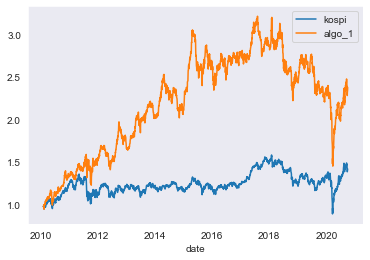

In [38]:
sns.set_style('dark')
final.add(1).cumprod().plot()

In [39]:
final.index = pd.to_datetime(final.index)

### 3년간 백테스팅

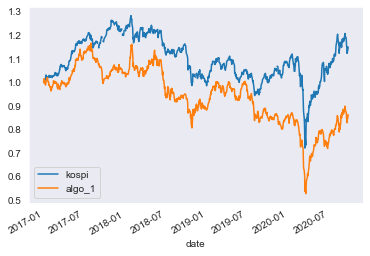

In [40]:
final[final.index > '2017-01-01'].add(1).cumprod().plot()

### 1년간 백테스팅

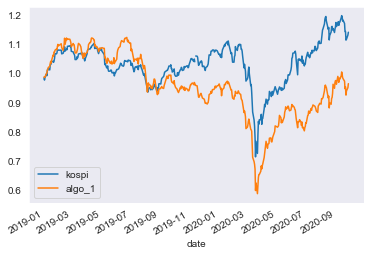

In [41]:
final[final.index > '2019-01-01'].add(1).cumprod().plot()

### 계량 투자전략 포트폴리오 날짜별 수익률

In [42]:
port_ret = pd.DataFrame(port_ret)
port_ret.columns = ['Return']
port_ret['Algo_Name'] = 'Big_LowPER_HighForeign'
port_ret2 = port_ret.reset_index()
port_ret2['Return'] = port_ret2['Return'].map(lambda x: round(x, 5))
port_ret3 = port_ret2[['date','Algo_Name','Return']]
port_ret4 = port_ret3.set_index('date')
port_ret4['BM_Ret'] = final['kospi']
port_ret4['BM_Ret'] = port_ret4['BM_Ret'].map(lambda x: round(x, 5))
port_ret4['BM_Ret'] = port_ret4['BM_Ret'].fillna(0)
port_ret5 = port_ret4.reset_index()
port_ret5['date'] = port_ret5['date'].map(lambda x: str(x)[:10])

In [43]:
port_ret5

,date,Algo_Name,Return,BM_Ret
0,2010-01-29,Big_LowPER_HighForeign,-0.02476,-0.02436
1,2010-02-01,Big_LowPER_HighForeign,0.00105,0.00250
2,2010-02-02,Big_LowPER_HighForeign,-0.00179,-0.00623
3,2010-02-03,Big_LowPER_HighForeign,0.01213,0.01190
4,2010-02-04,Big_LowPER_HighForeign,0.00895,0.00062
...,...,...,...,...
2629,2020-09-23,Big_LowPER_HighForeign,0.00705,0.00000
2630,2020-09-24,Big_LowPER_HighForeign,-0.02994,-0.02572
2631,2020-09-25,Big_LowPER_HighForeign,0.01536,0.00264
2632,2020-09-28,Big_LowPER_HighForeign,0.01180,0.01272


### 계량 투자전략 포트폴리오 날짜별 보유 ticker

In [44]:
date_ticker = backtest3.reset_index()
date_ticker['BM_ticker'] = '^KS11'
date_ticker['Algo_Name'] = 'Big_LowPER_HighForeign'

date_ticker2 = date_ticker[['date','Algo_Name','final_ticker', 'BM_ticker']]
date_ticker2.columns = ['date','Algo_Name', 'Port_Ticker', 'BM_Ticker']
date_ticker2['date'] = date_ticker2['date'].map(lambda x: str(x)[:10])
date_ticker3 = date_ticker2.reset_index().iloc[:,1:]
date_ticker3['Port_Ticker'] = date_ticker3['Port_Ticker'].map(lambda x: str(x)[1:-1])

In [45]:
date_ticker3

,date,Algo_Name,Port_Ticker,BM_Ticker
0,2010-01-29,Big_LowPER_HighForeign,"'004800', '000070', '016380', '054800', '00766...",^KS11
1,2010-02-01,Big_LowPER_HighForeign,"'004800', '000070', '016380', '054800', '00766...",^KS11
2,2010-02-02,Big_LowPER_HighForeign,"'004800', '000070', '016380', '054800', '00766...",^KS11
3,2010-02-03,Big_LowPER_HighForeign,"'004800', '000070', '016380', '054800', '00766...",^KS11
4,2010-02-04,Big_LowPER_HighForeign,"'004800', '000070', '016380', '054800', '00766...",^KS11
...,...,...,...,...
2629,2020-09-23,Big_LowPER_HighForeign,"'018670', '000210', '005850', '014830', '00594...",^KS11
2630,2020-09-24,Big_LowPER_HighForeign,"'018670', '000210', '005850', '014830', '00594...",^KS11
2631,2020-09-25,Big_LowPER_HighForeign,"'018670', '000210', '005850', '014830', '00594...",^KS11
2632,2020-09-28,Big_LowPER_HighForeign,"'018670', '000210', '005850', '014830', '00594...",^KS11


### 계량투자전략 포트폴리오 날짜별 보유 ticker insert

In [46]:
"""
stock_db = pymysql.connect(
    user='crawling',
    passwd='crawling123!',
    host='137.68.155.154', 
    port=3306,
    db='prj', 
    charset='utf8'
    )
"""

"\nstock_db = pymysql.connect(\n    user='crawling',\n    passwd='crawling123!',\n    host='137.68.155.154', \n    port=3306,\n    db='prj', \n    charset='utf8'\n    )\n"

In [47]:
"""
def insert(df) :
    insert_list = np.vstack(np.array(df)).tolist()
    val = insert_list

    cur = stock_db.cursor()
    cur.executemany(sql, val)
    stock_db.commit()

    result = cur.fetchall()
    return(result)
"""

'\ndef insert(df) :\n    insert_list = np.vstack(np.array(df)).tolist()\n    val = insert_list\n\n    cur = stock_db.cursor()\n    cur.executemany(sql, val)\n    stock_db.commit()\n\n    result = cur.fetchall()\n    return(result)\n'

In [49]:
"""
sql = "INSERT INTO tb_port_info(Date, Algo_Name, Port_Ticker, BM_Ticker) VALUES(%s, %s, %s, %s)" 
insert(date_ticker3)
"""

'\nsql = "INSERT INTO tb_port_info(Date, Algo_Name, Port_Ticker, BM_Ticker) VALUES(%s, %s, %s, %s)" \ninsert(date_ticker3)\n'

### 계량투자전략 포트폴리오 날짜별 수익률 insert

In [48]:
"""
sql = "INSERT INTO tb_port_ret(Date, Algo_Name, Return_, BM_ret) VALUES( %s, %s, %s, %s)" 
insert(port_ret5)
"""

'\nsql = "INSERT INTO tb_port_ret(Date, Algo_Name, Return_, BM_ret) VALUES( %s, %s, %s, %s)" \ninsert(port_ret5)\n'

### 날짜별 포트폴리오 종목명 확인

In [50]:
sql = """
select Ticker, Name
from tb_info
where class = 0
"""
cur = stock_db.cursor()
cur.execute(sql)
stock_db.commit()

result = cur.fetchall()

In [51]:
stk_info = pd.DataFrame(result)

In [52]:
stk_info.columns = ['ticker', 'ticker_name']

In [53]:
sql = """
select Date, Port_Ticker
from tb_port_info
where Algo_Name = 'Big_LowPER_HighForeign';
"""
cur = stock_db.cursor()
cur.execute(sql)
stock_db.commit()

result = cur.fetchall()

In [54]:
port_ticker = pd.DataFrame(result)
port_ticker.columns = ['date', 'port_ticker']

port_ticker['port_ticker'] = pd.Series(port_ticker['port_ticker']).map(lambda x: str(x).replace('"', ''))
port_ticker['port_ticker'] = port_ticker['port_ticker'].map(lambda x: str(x).replace("'", ''))
port_ticker['port_ticker'] = port_ticker['port_ticker'].map(lambda x: str(x).strip())
port_ticker['port_ticker'] = port_ticker['port_ticker'].map(lambda x: x.split(', '))

stk_info.index = stk_info.ticker
arr_1 = np.empty(10,)

In [55]:
for i in range(len(port_ticker.date)) :
    arr_2 = np.array(stk_info.loc[port_ticker['port_ticker'][i], :]['ticker_name'])
    arr_1 = np.vstack([arr_1, arr_2])

In [56]:
port_ticker['ticker_name'] = arr_1[1:].tolist()

In [57]:
port_ticker

,date,port_ticker,ticker_name
0,2010-01-29,"[004800, 000070, 016380, 054800, 007660, 03683...","[효성, 삼양홀딩스, KG동부제철, 아이디스홀딩스, 이수페타시스, 솔브레인홀딩스, ..."
1,2010-02-01,"[004800, 000070, 016380, 054800, 007660, 03683...","[효성, 삼양홀딩스, KG동부제철, 아이디스홀딩스, 이수페타시스, 솔브레인홀딩스, ..."
2,2010-02-02,"[004800, 000070, 016380, 054800, 007660, 03683...","[효성, 삼양홀딩스, KG동부제철, 아이디스홀딩스, 이수페타시스, 솔브레인홀딩스, ..."
3,2010-02-03,"[004800, 000070, 016380, 054800, 007660, 03683...","[효성, 삼양홀딩스, KG동부제철, 아이디스홀딩스, 이수페타시스, 솔브레인홀딩스, ..."
4,2010-02-04,"[004800, 000070, 016380, 054800, 007660, 03683...","[효성, 삼양홀딩스, KG동부제철, 아이디스홀딩스, 이수페타시스, 솔브레인홀딩스, ..."
...,...,...,...
2629,2020-09-23,"[018670, 000210, 005850, 014830, 005940, 09305...","[SK가스, 대림산업, 에스엘, 유니드, NH투자증권, LF, KPX케미칼, 대상홀..."
2630,2020-09-24,"[018670, 000210, 005850, 014830, 005940, 09305...","[SK가스, 대림산업, 에스엘, 유니드, NH투자증권, LF, KPX케미칼, 대상홀..."
2631,2020-09-25,"[018670, 000210, 005850, 014830, 005940, 09305...","[SK가스, 대림산업, 에스엘, 유니드, NH투자증권, LF, KPX케미칼, 대상홀..."
2632,2020-09-28,"[018670, 000210, 005850, 014830, 005940, 09305...","[SK가스, 대림산업, 에스엘, 유니드, NH투자증권, LF, KPX케미칼, 대상홀..."
